Grade = 10/10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

/Users/zhizhou/.virtualenvs/data-analysis/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/zhizhou/.matplotlib/matplotlibrc", line #2
  (fname, cnt))
/Users/zhizhou/.virtualenvs/data-analysis/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/zhizhou/.matplotlib/matplotlibrc", line #3
  (fname, cnt))


> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [2]:
df = pd.read_csv("311-2014.csv",nrows=200000)
df.head()

/Users/zhizhou/.virtualenvs/data-analysis/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8,17,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)"
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 53 columns):
Unique Key                        200000 non-null int64
Created Date                      200000 non-null object
Closed Date                       188913 non-null object
Agency                            200000 non-null object
Agency Name                       200000 non-null object
Complaint Type                    200000 non-null object
Descriptor                        198197 non-null object
Location Type                     179328 non-null object
Incident Zip                      181049 non-null object
Incident Address                  152173 non-null object
Street Name                       152152 non-null object
Cross Street 1                    108035 non-null object
Cross Street 2                    107583 non-null object
Intersection Street 1             24790 non-null object
Intersection Street 2             24530 non-null object
Address Type                      177

In [4]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

df['created_datetime'] = df['Created Date'].apply(parse_date)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:18:32
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27


In [5]:
df.index=df['created_datetime']
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29


What was the **most popular type of complaint**, and how many times was it filed?

In [6]:
df['Complaint Type'].describe()

count               200000
unique                 180
top       Blocked Driveway
freq                 21779
Name: Complaint Type, dtype: object

Make a horizontal bar graph of the **top 5 most frequent complaint types**.

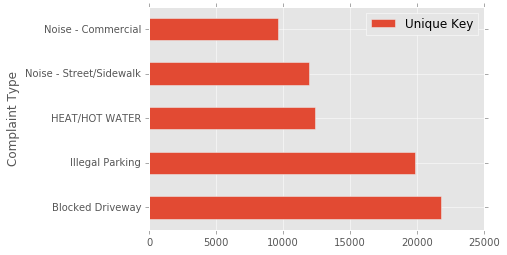

In [7]:
df.groupby(by="Complaint Type").count().sort_values(by="Unique Key",ascending=False).head(5).plot(kind='barh',y="Unique Key")

Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [8]:
df.groupby(by='Borough').sum()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
Borough,,,,,,
BRONX,919535327189,2.904452e+10,7.112721e+09,NaN,1.167203e+06,-2.111071e+06
BROOKLYN,1769257630136,5.517445e+10,9.864179e+09,NaN,2.250420e+06,-4.093623e+06
MANHATTAN,1301805321201,3.964048e+10,8.903420e+09,NaN,1.627650e+06,-2.952353e+06
QUEENS,1447514966583,4.609830e+10,9.084831e+09,NaN,1.825683e+06,-3.310453e+06
STATEN ISLAND,228494389272,6.771637e+09,1.107594e+09,NaN,2.903115e+05,-5.302118e+05
Unspecified,523602165128,9.986470e+05,2.197210e+05,NaN,4.076975e+01,-7.394802e+01


In [9]:
# Bronx
print("Bronx:",919535327189/1438159)
print("Brooklyn:",1769257630136/2621793)
print("Manhattan:",1301805321201/1636268)
print("Queens:",1447514966583/2321580)
print("Staten Island:",228494389272/473279)

Bronx: 639383.6336517729
Brooklyn: 674827.3529359488
Manhattan: 795594.194350192
Queens: 623504.2370209082
Staten Island: 482790.04407970776


In [10]:
print("Manhattan has the most complaints per capita.")

Manhattan has the most complaints per capita.


According to your selection of data, **how many cases were filed in March?** How about May?

In [11]:
df.groupby(by=df.index.month).sum()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
1,210899217759,6.203454e+09,1.246148e+09,NaN,2.518108e+05,-4.571942e+05
2,243835272672,7.309517e+09,1.479036e+09,NaN,2.962316e+05,-5.377343e+05
3,453688568438,1.351508e+10,2.716170e+09,NaN,5.474553e+05,-9.938352e+05
4,611312361763,1.677010e+10,3.388401e+09,NaN,6.797617e+05,-1.233977e+06
5,1522395156771,4.160095e+10,8.549057e+09,NaN,1.685600e+06,-3.059047e+06
6,445504877223,1.213200e+10,2.463990e+09,NaN,4.914537e+05,-8.920373e+05
7,467971162466,1.393863e+10,2.819882e+09,NaN,5.646099e+05,-1.024878e+06
8,382096717824,1.140102e+10,2.325874e+09,NaN,4.617128e+05,-8.379848e+05
9,431775195179,1.261481e+10,2.562997e+09,NaN,5.111661e+05,-9.278302e+05
10,785113710711,2.312573e+10,4.789555e+09,NaN,9.372598e+05,-1.700781e+06


In [12]:
print(611312361763,"cases were filed in March and", 1522395156771,"were filed in May.")

611312361763 cases were filed in March and 1522395156771 were filed in May.


I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [13]:
df["2015-04-01"]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-04-01 21:37:42,30311691,04/01/2015 09:37:42 PM,04/01/2015 10:49:33 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.609810,-73.922498,"(40.60980966645303, -73.92249759633725)",2015-04-01 21:37:42
2015-04-01 23:12:04,30307701,04/01/2015 11:12:04 PM,04/01/2015 11:32:40 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11205,700 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694644,-73.955504,"(40.694643700748486, -73.95550356170298)",2015-04-01 23:12:04
2015-04-01 13:10:35,30313389,04/01/2015 01:10:35 PM,04/07/2015 04:01:08 PM,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11422,245-16 149 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.653016,-73.738626,"(40.653016256598534, -73.73862588133056)",2015-04-01 13:10:35
2015-04-01 17:37:38,30314393,04/01/2015 05:37:38 PM,04/03/2015 11:40:54 AM,DPR,Department of Parks and Recreation,Maintenance or Facility,Hours of Operation,Park,11211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 17:37:38
2015-04-01 12:32:40,30309207,04/01/2015 12:32:40 PM,04/17/2015 01:06:49 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Installation/Work Quality,NaN,11423,90-71 198 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.714299,-73.761158,"(40.71429859671565, -73.76115807774032)",2015-04-01 12:32:40
2015-04-01 18:44:50,30311759,04/01/2015 06:44:50 PM,06/24/2015 11:27:00 AM,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,10467,862 EAST 213 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.878028,-73.860237,"(40.87802828144708, -73.86023734606933)",2015-04-01 18:44:50
2015-04-01 16:30:15,30309690,04/01/2015 04:30:15 PM,04/01/2015 11:27:22 PM,NYPD,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11368,107-15 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.757811,-73.861677,"(40.757811195752154, -73.86167714731972)",2015-04-01 16:30:15
2015-04-01 09:04:07,30307990,04/01/2015 09:04:07 AM,04/06/2015 09:17:10 AM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,Miscellaneous,Senior Address,10027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 09:04:07
2015-04-01 07:46:58,30308253,04/01/2015 07:46:58 AM,04/01/2015 09:32:31 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11370,32-51 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.756412,-73.887405,"(40.75641194675221, -73.88740503059863)",2015-04-01 07:46:58


What was the most popular type of complaint on April 1st?

What were the **most popular three types of complaint** on April 1st

In [14]:
df["2015-04-01"]['Complaint Type'].describe()

count                 573
unique                 54
top       Illegal Parking
freq                   67
Name: Complaint Type, dtype: object

In [15]:
df["2015-04-01"].groupby(by="Complaint Type").count().sort_values(by="Unique Key",ascending=False).head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Illegal Parking,67,67,67,67,67,67,67,67,58,58,...,0,0,0,0,0,0,67,67,67,67
Street Condition,64,64,64,64,64,64,64,61,38,38,...,0,0,0,0,0,0,61,61,61,64
Blocked Driveway,58,58,58,58,58,58,58,58,57,57,...,0,0,0,0,0,0,58,58,58,58


**What month has the most reports filed?** How many? Graph it.

In [16]:
df.groupby(by=df.index.month).sum().sort_values(by="Unique Key",ascending=False).head(1)

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
5,1522395156771,4.160095e+10,8.549057e+09,NaN,1.685600e+06,-3.059047e+06


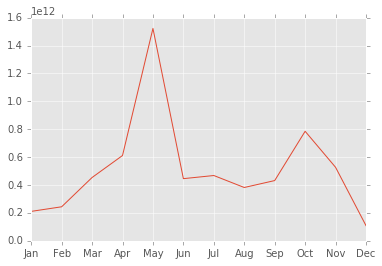

In [17]:
ax = df.groupby(by=df.index.month).sum().plot(y='Unique Key',legend=False)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

**What week of the year has the most reports filed?** How many? Graph the weekly complaints.

In [18]:
df.groupby(by=df.index.week).sum().sort_values(by="Unique Key",ascending=False).head(1)

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
19,414419941775,1.163834e+10,2.403454e+09,NaN,471525.638655,-855663.249346


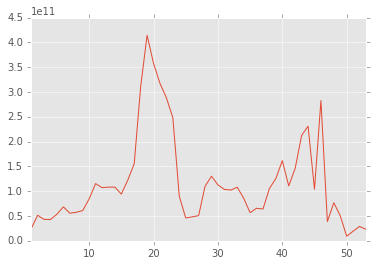

In [19]:
bx = df.groupby(by=df.index.week).sum().plot(y='Unique Key',legend=False)

Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

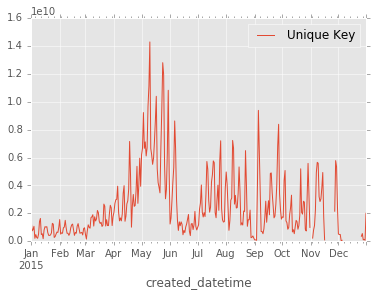

In [20]:
df[df["Complaint Type"].str.contains("Noise")==True].resample('D').sum().plot(y="Unique Key")

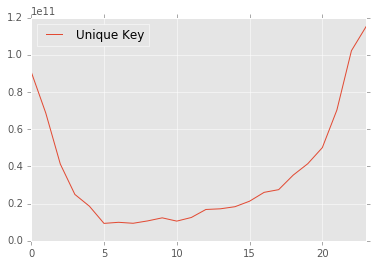

In [21]:
noice = df[df["Complaint Type"].str.contains("Noise")==True]
noice.groupby(by=noice.index.hour).sum().plot(y="Unique Key")

**Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

In [22]:
df.groupby(by=df.index.day).sum().sort_values(by="Unique Key",ascending=False).head(5)

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
28,272269115269,7.547305e+09,1.535151e+09,NaN,305864.986509,-555178.387133
9,257789034671,7.398878e+09,1.510742e+09,NaN,299853.328927,-544236.313573
29,243668454865,6.673321e+09,1.349104e+09,NaN,270449.526431,-490939.786927
8,225909868701,6.424068e+09,1.315761e+09,NaN,260356.534595,-472528.836187
5,225494952877,6.340463e+09,1.294876e+09,NaN,256885.031146,-466238.623963


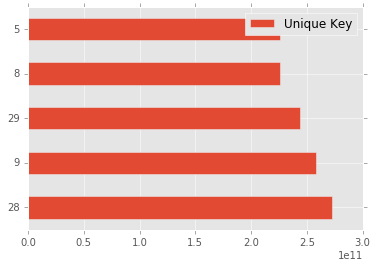

In [23]:
df.groupby(by=df.index.day).sum().sort_values(by="Unique Key",ascending=False).head(5).plot(kind='barh',y="Unique Key")

**What hour of the day are the most complaints?** Graph a day of complaints.

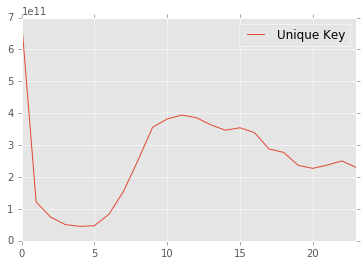

In [24]:
df.groupby(by=df.index.hour).sum().plot(y="Unique Key")

One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

In [25]:
comp = df.groupby(by=df.index.hour).sum()
comp['Unique Key'].min()

45317144764

In [26]:
comp[comp['Unique Key']==45317144764]

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
4,45317144764,1.402815e+09,294112981.0,NaN,56799.553932,-103044.917887


In [27]:
df[df.index.hour == 4].groupby(by='Complaint Type').sum().sort_values(by="Unique Key",ascending=False).head()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
Complaint Type,,,,,,
Noise - Street/Sidewalk,8584726092,269465736.0,59697236.0,NaN,10968.684098,-19889.017318
Blocked Driveway,7819083725,254070492.0,50656668.0,NaN,10220.860945,-18548.651818
Illegal Parking,5098425586,164877942.0,31735712.0,NaN,6674.433214,-12123.508375
Noise - Commercial,4896334919,157109562.0,32933197.0,NaN,6396.557555,-11608.679784
Noise - Vehicle,4520679897,145909305.0,31145159.0,NaN,5909.647993,-10718.473343


In [28]:
df[df.index.hour == 3].groupby(by='Complaint Type').sum().sort_values(by="Unique Key").head()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
Complaint Type,,,,,,
Fire Alarm - New System,29884409,996116.0,181060.0,NaN,40.663637,-73.957229
Ferry Complaint,30092020,NaN,NaN,NaN,NaN,NaN
Fire Safety Director - F58,30253845,988251.0,217280.0,NaN,40.763059,-73.985557
Food Poisoning,30408743,1004136.0,217377.0,NaN,40.763304,-73.928214
DCA / DOH New License Application Request,30419085,NaN,NaN,NaN,NaN,NaN


In [29]:
df[df.index.hour == 5].groupby(by='Complaint Type').sum().sort_values(by="Unique Key").head()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
Complaint Type,,,,,,
Broken Muni Meter,29874142,994620.0,164323.0,NaN,40.617699,-73.962647
EAP Inspection - F59,29981045,984667.0,209357.0,NaN,40.741313,-73.998495
Fire Alarm - Reinspection,29993422,988631.0,210038.0,NaN,40.743181,-73.984190
Broken Parking Meter,29998294,963338.0,173196.0,NaN,40.642035,-74.075353
Noise - Helicopter,30386250,1006142.0,216404.0,NaN,40.760628,-73.920976


So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

In [30]:
df[df.index.hour == 0].groupby(df[df.index.hour == 0].index.minute).count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
0,17116,17116,16721,17116,17116,17116,17116,17098,17098,16983,...,0,0,0,0,0,0,17093,17093,17093,17116
1,109,109,108,109,109,109,109,105,103,90,...,0,0,0,0,0,0,102,102,102,109
2,91,91,88,91,91,91,90,81,88,72,...,0,0,1,0,0,0,87,87,87,91
3,99,99,97,99,99,99,99,94,96,83,...,1,1,1,0,0,0,95,95,95,99
4,106,106,103,106,106,106,105,101,103,93,...,1,1,1,0,0,0,103,103,103,106
5,94,94,91,94,94,94,93,89,90,80,...,0,0,0,1,0,0,88,88,88,94
6,106,106,103,106,106,106,105,101,101,90,...,2,2,2,0,0,0,101,101,101,106
7,106,106,103,106,106,106,106,101,102,90,...,1,1,2,0,0,0,102,102,102,106
8,95,95,94,95,95,95,95,92,92,80,...,1,1,1,0,0,0,90,90,90,95
9,82,82,80,82,82,82,81,80,78,71,...,1,1,1,0,0,0,77,77,77,82


Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

In [31]:
df.groupby(by="Agency Name").sum().sort_values(by="Unique Key",ascending=False).head(5)

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
Agency Name,,,,,,
New York City Police Department,2473961762558,7.940710e+10,1.609646e+10,NaN,3.216822e+06,-5.839031e+06
Department of Housing Preservation and Development,1231015825631,3.627067e+10,7.712933e+09,NaN,1.469218e+06,-2.664931e+06
Department of Transportation,686151793237,1.992687e+10,3.996560e+09,NaN,8.075138e+05,-1.466021e+06
Department of Parks and Recreation,468429829148,1.240568e+10,2.379242e+09,NaN,5.016641e+05,-9.112131e+05
Department of Health and Mental Hygiene,253082658742,8.206160e+09,1.698523e+09,NaN,3.333858e+05,-6.050706e+05


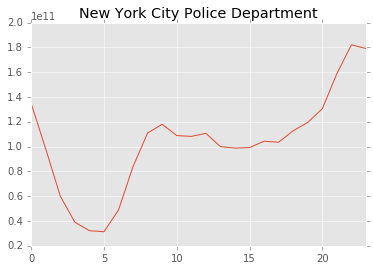

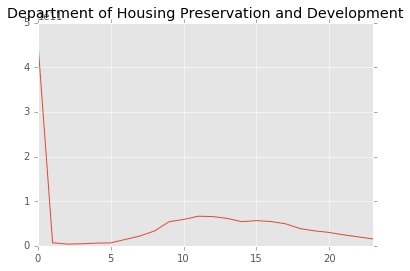

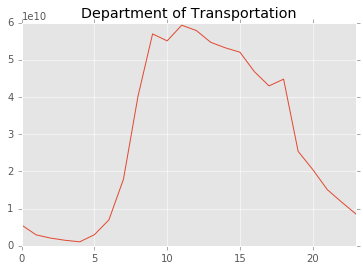

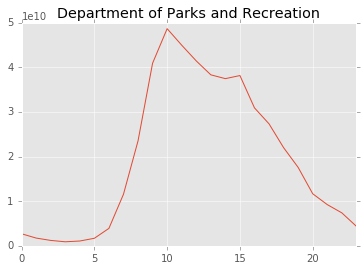

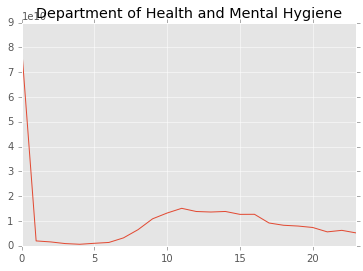

In [32]:
df[df['Agency Name']=="New York City Police Department"].groupby(df[df['Agency Name']=="New York City Police Department"].index.hour).sum().plot(y="Unique Key",legend=False,title="New York City Police Department")
df[df['Agency Name']=="Department of Housing Preservation and Development"].groupby(df[df['Agency Name']=="Department of Housing Preservation and Development"].index.hour).sum().plot(y="Unique Key",legend=False,title="Department of Housing Preservation and Development")
df[df['Agency Name']=="Department of Transportation"].groupby(df[df['Agency Name']=="Department of Transportation"].index.hour).sum().plot(y="Unique Key",legend=False,title="Department of Transportation")
df[df['Agency Name']=="Department of Parks and Recreation"].groupby(df[df['Agency Name']=="Department of Parks and Recreation"].index.hour).sum().plot(y="Unique Key",legend=False,title="Department of Parks and Recreation")
df[df['Agency Name']=="Department of Health and Mental Hygiene"].groupby(df[df['Agency Name']=="Department of Health and Mental Hygiene"].index.hour).sum().plot(y="Unique Key",legend=False,title="Department of Health and Mental Hygiene")

Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

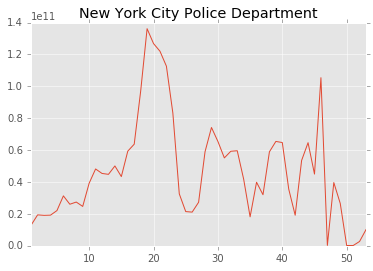

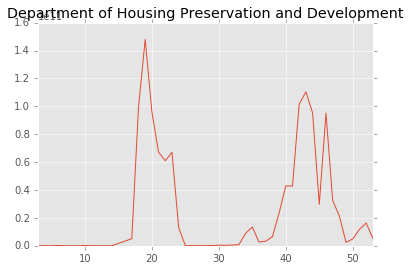

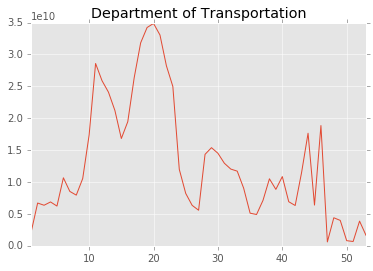

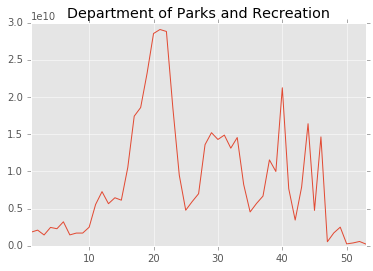

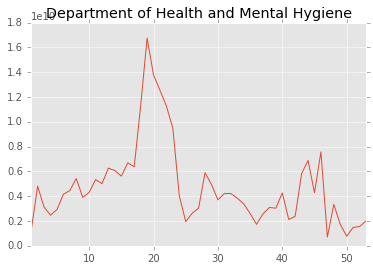

In [33]:
df[df['Agency Name']=="New York City Police Department"].groupby(df[df['Agency Name']=="New York City Police Department"].index.week).sum().plot(y="Unique Key",legend=False,title="New York City Police Department")
df[df['Agency Name']=="Department of Housing Preservation and Development"].groupby(df[df['Agency Name']=="Department of Housing Preservation and Development"].index.week).sum().plot(y="Unique Key",legend=False,title="Department of Housing Preservation and Development")
df[df['Agency Name']=="Department of Transportation"].groupby(df[df['Agency Name']=="Department of Transportation"].index.week).sum().plot(y="Unique Key",legend=False,title="Department of Transportation")
df[df['Agency Name']=="Department of Parks and Recreation"].groupby(df[df['Agency Name']=="Department of Parks and Recreation"].index.week).sum().plot(y="Unique Key",legend=False,title="Department of Parks and Recreation")
df[df['Agency Name']=="Department of Health and Mental Hygiene"].groupby(df[df['Agency Name']=="Department of Health and Mental Hygiene"].index.week).sum().plot(y="Unique Key",legend=False,title="Department of Health and Mental Hygiene")

Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.

In [34]:
NYPD = df[df['Agency Name']=="New York City Police Department"]
NYPD[NYPD.index.month==7].groupby(by='Complaint Type').sum().sort_values(by="Unique Key",ascending=False).head(3)

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
Complaint Type,,,,,,
Illegal Parking,61831820540,1.964811e+09,388982402.0,NaN,79593.399795,-144523.437424
Blocked Driveway,58756848476,1.905215e+09,380825004.0,NaN,76598.663403,-138999.694215
Noise - Street/Sidewalk,52803031380,1.642856e+09,360598582.0,NaN,66702.386571,-120946.193709


In [35]:
NYPD[NYPD.index.month==8].groupby(by='Complaint Type').sum().sort_values(by="Unique Key",ascending=False).head(3)

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
Complaint Type,,,,,,
Noise - Street/Sidewalk,45920809451,1.452773e+09,314853614.0,NaN,59025.502359,-107052.422930
Illegal Parking,45571356579,1.448219e+09,285541961.0,NaN,58623.666483,-106448.462886
Blocked Driveway,42846575996,1.375052e+09,275038241.0,NaN,55220.829976,-100198.171995


In [36]:
NYPD[NYPD.index.month==5].groupby(by='Complaint Type').sum().sort_values(by="Unique Key",ascending=False).head(3)

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
Complaint Type,,,,,,
Blocked Driveway,126005298726,4.133154e+09,821959551.0,NaN,166376.862179,-301961.579466
Illegal Parking,121749810922,3.903951e+09,768754161.0,NaN,158277.874176,-287433.395207
Noise - Street/Sidewalk,103687316125,3.328000e+09,727845308.0,NaN,135391.201252,-245539.835861


In [54]:
HPD = df[df['Agency Name']=="Department of Housing Preservation and Development"]
# HPD[NYPD.index.quarter]
HPD[HPD.index.month==1].groupby(by='Complaint Type').sum().sort_values(by="Unique Key",ascending=False).head(3)

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
Complaint Type,,,,,,
UNSANITARY CONDITION,118932279,3993666.0,773237.0,NaN,162.788986,-295.795697
PAINT/PLASTER,59595450,1965630.0,405487.0,NaN,81.446321,-148.010353
GENERAL,29757521,981727.0,197950.0,NaN,40.710003,-74.009100


In [55]:
HPD[HPD.index.month==7].groupby(by='Complaint Type').sum().sort_values(by="Unique Key",ascending=False).head(3)

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
Complaint Type,,,,,,
UNSANITARY CONDITION,497585870,16135938.0,3323007.0,NaN,651.786810,-1182.599627
WATER LEAK,124746632,4011862.0,838310.0,NaN,162.967579,-295.729740
PAINT/PLASTER,93412117,3006216.0,672132.0,NaN,122.344776,-221.806878
